In [1]:
import sys
sys.path.append('..')

import numpy as np
from plane_ransac import CudaRansac

from util import generate_planar_cloud, plot_point_clouds, plot_planes

Here we create four point clouds, each one is a plane but with some noise, which is determined by `sigma`, and with some outliers, the ratio of which is determined by `outlier ratio`

In [6]:
points_number = 1000
corner = np.array([0, 0, 0])
edge_length = 5
sigma = 0.1
outlier_ratio = 0.25

pcs = [
    generate_planar_cloud(
        points_number=points_number,
        plane_coefficients=(0, 0, 1, 0.5),
        voxel_corner=np.array([0, 0, 0]),
        edge_length=5,
        sigma=sigma,
        outlier_ratio=outlier_ratio,
    ),
    generate_planar_cloud(
        points_number=points_number,
        plane_coefficients=(1, 0, 1, 0.5),
        voxel_corner=np.array([5, 0, 0]),
        edge_length=5,
        sigma=sigma,
        outlier_ratio=outlier_ratio,
    ),
]


We can see that the clouds are planar but noisy

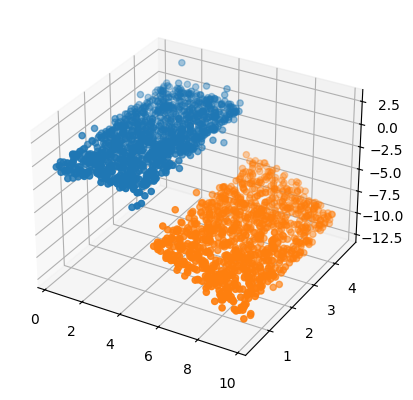

In [7]:
plot_point_clouds(pcs)

Using `CudaRansac` we can find the masks for the inliers and after applying the masks we get the clouds without the outliers

In [8]:
cuda_ransac = CudaRansac(threshold=0.1)

planes = cuda_ransac.evaluate_planes(pcs)

/media/mikhailkiselyov/data/code/spbu/python-plane-ransac/venv/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


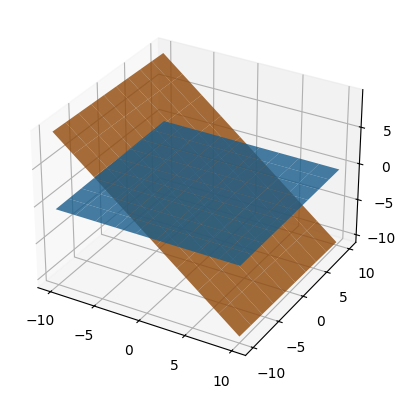

In [9]:
plot_planes(planes)